In [1]:
import pandas as pd 
df = pd.read_csv('../data/for_modeling.csv')

In [2]:
df.isnull().sum()

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [3]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
label_encoders = {}
for column in ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [5]:
X = df.drop(columns=["id", "stroke"])
y = df["stroke"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)

# # Convert PyTorch tensors to NumPy arrays
# X_train_np = X_train_tensor.numpy()
# y_train_np = y_train_tensor.numpy()
# X_test_np = X_test_tensor.numpy()

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values


In [12]:
# Define and train the TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train_np, y_train_np, max_epochs=200, patience=10)

# Convert test data to NumPy array
# X_test_np = X_test_tensor.numpy()

# Predictions
y_pred = tabnet_model.predict(X_test_np)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.47281 |  0:00:00s
epoch 1  | loss: 0.23737 |  0:00:00s
epoch 2  | loss: 0.18281 |  0:00:01s
epoch 3  | loss: 0.17076 |  0:00:01s
epoch 4  | loss: 0.17241 |  0:00:01s
epoch 5  | loss: 0.14584 |  0:00:02s
epoch 6  | loss: 0.14282 |  0:00:02s
epoch 7  | loss: 0.12    |  0:00:02s
epoch 8  | loss: 0.11625 |  0:00:03s
epoch 9  | loss: 0.11143 |  0:00:03s
epoch 10 | loss: 0.10034 |  0:00:03s
epoch 11 | loss: 0.09516 |  0:00:04s
epoch 12 | loss: 0.08626 |  0:00:04s
epoch 13 | loss: 0.07341 |  0:00:04s
epoch 14 | loss: 0.06772 |  0:00:04s
epoch 15 | loss: 0.06649 |  0:00:05s
epoch 16 | loss: 0.0627  |  0:00:05s
epoch 17 | loss: 0.05759 |  0:00:05s
epoch 18 | loss: 0.04949 |  0:00:06s
epoch 19 | loss: 0.03711 |  0:00:06s
epoch 20 | loss: 0.02681 |  0:00:06s
epoch 21 | loss: 0.02884 |  0:00:07s
epoch 22 | loss: 0.03112 |  0:00:07s
epoch 23 | loss: 0.03084 |  0:00:08s
epoch 24 | loss: 0.04158 |  0:00:08s
epoch 25 | loss: 0.04416 |  0:00:08s
epoch 26 | loss: 0.02964 |  0:00:09s
e

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Get the number of classes
num_classes = len(np.unique(y_test))

# Print the metrics for each class
print("Precision for each class:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall for each class:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1-score for each class:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")

Precision for each class:
Class 0: 1.0000
Class 1: 0.9231

Recall for each class:
Class 0: 0.9948
Class 1: 1.0000

F1-score for each class:
Class 0: 0.9974
Class 1: 0.9600


AUC-ROC: 1.00


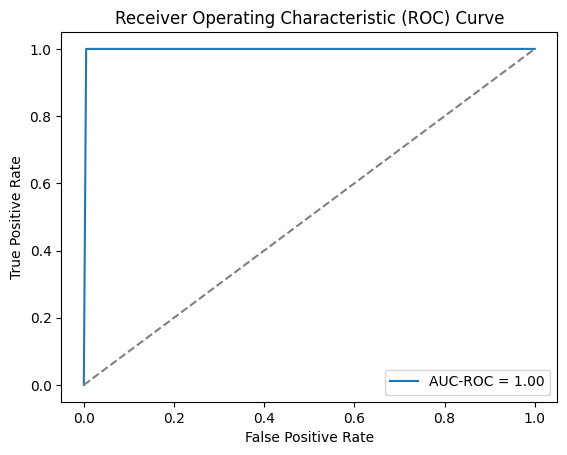

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)


roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()